In [1]:

import os
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO  # Ensure you have `pip install ultralytics`
import random


# --- CONFIG ---
# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {DEVICE}") 
BASE_DATA_ROOT = "../soccernet_data/tracking"
GT_FILENAME = "gt.txt"
IMAGE_FOLDER = "img1"
IMAGE_EXTS = ['.jpg', '.png']
NUM_VISUALS = 10
SCORE_THRESH = 0.8
IOU_THRESH = 0.5
SAMPLE_PER_SEQ = 30

Using device: cuda


Using device: cuda
Processing sequences...


Sequences:   0%|          | 0/49 [00:00<?, ?it/s]


0: 384x640 13 persons, 3.2ms
Speed: 1.9ms preprocess, 3.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 sports ball, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.3ms postprocess per image at s

Sequences:   2%|▏         | 1/49 [00:01<01:19,  1.65s/it]


0: 384x640 10 persons, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 3.4ms
Speed: 1.3ms preprocess, 3.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 3.6ms
Speed: 1.8ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 38

Sequences:   4%|▍         | 2/49 [00:03<01:12,  1.54s/it]


0: 384x640 13 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 sports ball, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.4ms
Speed: 1.1ms preprocess, 3.4ms inference, 0.6ms postprocess per image at s

Sequences:   6%|▌         | 3/49 [00:04<01:08,  1.49s/it]


0: 384x640 14 persons, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 fire hydrant, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 1.7ms postprocess per image at s

Sequences:   8%|▊         | 4/49 [00:06<01:08,  1.53s/it]


0: 384x640 17 persons, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 1 sports ball, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 1 sports ball, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.3ms postprocess

Sequences:  10%|█         | 5/49 [00:07<01:05,  1.48s/it]


0: 384x640 15 persons, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 umbrella, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 sports ball, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.3ms postprocess p

Sequences:  12%|█▏        | 6/49 [00:09<01:05,  1.52s/it]


0: 384x640 12 persons, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 3.4ms
Speed: 1.1ms preprocess, 3.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 sports ball, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 1.5ms postprocess per image at

Sequences:  14%|█▍        | 7/49 [00:10<01:04,  1.53s/it]


0: 384x640 17 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 38

Sequences:  16%|█▋        | 8/49 [00:12<01:04,  1.58s/it]


0: 384x640 15 persons, 5.4ms
Speed: 1.1ms preprocess, 5.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 5.1ms
Speed: 1.3ms preprocess, 5.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 3.8ms
Speed: 1.3ms preprocess, 3.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 4.0ms
Speed: 1.3ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 3.5ms
Speed: 2.1ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 1 sports ball, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 1.0ms postprocess per image at 

Sequences:  18%|█▊        | 9/49 [00:13<01:01,  1.54s/it]


0: 384x640 10 persons, 1 sports ball, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 sports ball, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 sports ball, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.5m

Sequences:  20%|██        | 10/49 [00:15<01:00,  1.56s/it]


0: 384x640 8 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

Sequences:  22%|██▏       | 11/49 [00:17<00:59,  1.57s/it]


0: 384x640 18 persons, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 38

Sequences:  24%|██▍       | 12/49 [00:18<00:59,  1.60s/it]


0: 384x640 18 persons, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 persons, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 38

Sequences:  27%|██▋       | 13/49 [00:20<00:58,  1.63s/it]


0: 384x640 17 persons, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 sports ball, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.3ms postprocess per image at sha

Sequences:  29%|██▊       | 14/49 [00:22<00:57,  1.63s/it]


0: 384x640 11 persons, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 1 sports ball, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at 

Sequences:  31%|███       | 15/49 [00:23<00:55,  1.64s/it]


0: 384x640 13 persons, 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 1 sports ball, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3.4ms
Speed: 1.4ms preprocess, 3.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at 

Sequences:  33%|███▎      | 16/49 [00:25<00:53,  1.61s/it]


0: 384x640 20 persons, 1 sports ball, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.6ms
Speed: 2.3ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.9ms postprocess per image at 

Sequences:  35%|███▍      | 17/49 [00:26<00:50,  1.59s/it]


0: 384x640 11 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 38

Sequences:  37%|███▋      | 18/49 [00:28<00:49,  1.60s/it]


0: 384x640 15 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 2 sports balls, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 sports ball, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 sports ball, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3

Sequences:  39%|███▉      | 19/49 [00:29<00:47,  1.58s/it]


0: 384x640 15 persons, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 4.0ms
Speed: 1.3ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 3.5ms
Speed: 1.6ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384

Sequences:  41%|████      | 20/49 [00:31<00:42,  1.47s/it]


0: 384x640 14 persons, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 8.7ms
Speed: 1.2ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 sports ball, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at sha

Sequences:  43%|████▎     | 21/49 [00:32<00:42,  1.50s/it]


0: 384x640 13 persons, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 fire hydrants, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3.5ms
Speed: 1.3ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 5.3ms
Speed: 1.5ms preprocess, 5.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 sports ball, 3.8ms
Speed: 1.3ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 1 sports ball, 4.0ms
Speed: 1.3ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.6ms pos

Sequences:  45%|████▍     | 22/49 [00:34<00:40,  1.50s/it]


0: 384x640 11 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 8.3ms
Speed: 1.6ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 38

Sequences:  47%|████▋     | 23/49 [00:35<00:39,  1.53s/it]


0: 384x640 18 persons, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 sports ball, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 sports ball, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 1 sports ball, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 3.8ms
Speed: 1.0ms preprocess, 3.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.

Sequences:  49%|████▉     | 24/49 [00:37<00:37,  1.51s/it]


0: 384x640 15 persons, 3.4ms
Speed: 1.2ms preprocess, 3.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 sports ball, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 2 sports balls, 3.8ms
Speed: 1.3ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3.5ms
Speed: 1.3ms preprocess, 3.5ms inference, 0.7ms postproce

Sequences:  51%|█████     | 25/49 [00:38<00:36,  1.51s/it]


0: 384x640 10 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 1 sports ball, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shap

Sequences:  53%|█████▎    | 26/49 [00:40<00:35,  1.52s/it]


0: 384x640 6 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 3.4ms
Speed: 1.2ms preprocess, 3.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640

Sequences:  55%|█████▌    | 27/49 [00:41<00:32,  1.47s/it]


0: 384x640 9 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Sequences:  57%|█████▋    | 28/49 [00:43<00:30,  1.45s/it]


0: 384x640 12 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 6

Sequences:  59%|█████▉    | 29/49 [00:44<00:29,  1.46s/it]


0: 384x640 14 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 3.4ms
Speed: 1.0ms preprocess, 3.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.7ms
Speed: 1.0ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 sports ball, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape

Sequences:  61%|██████    | 30/49 [00:45<00:26,  1.39s/it]


0: 384x640 5 persons, 1 sports ball, 3.7ms
Speed: 1.5ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 4.0ms
Speed: 1.4ms preprocess, 4.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 sports ball, 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 sports ball, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 sports ball, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 sports ball, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 3.6ms
Spe

Sequences:  63%|██████▎   | 31/49 [00:47<00:25,  1.40s/it]


0: 384x640 3 persons, 1 sports ball, 3.4ms
Speed: 1.1ms preprocess, 3.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 1 car, 1 sports ball, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.6ms
Speed: 1.4ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 3.4ms
Speed: 1.1ms preprocess, 3.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 sports ball, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 

Sequences:  65%|██████▌   | 32/49 [00:48<00:24,  1.41s/it]


0: 384x640 12 persons, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 8.3ms
Speed: 1.5ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 sports ball, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at s

Sequences:  67%|██████▋   | 33/49 [00:50<00:23,  1.50s/it]


0: 384x640 10 persons, 1 sports ball, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at s

Sequences:  69%|██████▉   | 34/49 [00:51<00:22,  1.53s/it]


0: 384x640 17 persons, 1 sports ball, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 sports ball, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess 

Sequences:  71%|███████▏  | 35/49 [00:53<00:20,  1.45s/it]


0: 384x640 16 persons, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.7ms
Speed: 2.4ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 

Sequences:  73%|███████▎  | 36/49 [00:54<00:19,  1.51s/it]


0: 384x640 20 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 persons, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 persons, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 38

Sequences:  76%|███████▌  | 37/49 [00:56<00:18,  1.57s/it]


0: 384x640 17 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 3.4ms
Speed: 1.0ms preprocess, 3.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 38

Sequences:  78%|███████▊  | 38/49 [00:58<00:17,  1.57s/it]


0: 384x640 18 persons, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 38

Sequences:  80%|███████▉  | 39/49 [00:59<00:15,  1.59s/it]


0: 384x640 16 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 8.2ms
Speed: 1.6ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 38

Sequences:  82%|████████▏ | 40/49 [01:01<00:14,  1.60s/it]


0: 384x640 22 persons, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384

Sequences:  84%|████████▎ | 41/49 [01:02<00:12,  1.60s/it]


0: 384x640 11 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 38

Sequences:  86%|████████▌ | 42/49 [01:04<00:11,  1.58s/it]


0: 384x640 17 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 persons, 1 sports ball, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at 

Sequences:  88%|████████▊ | 43/49 [01:06<00:09,  1.59s/it]


0: 384x640 16 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 1 sports ball, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at 

Sequences:  90%|████████▉ | 44/49 [01:07<00:07,  1.56s/it]


0: 384x640 19 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 9.8ms
Speed: 1.6ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 6

Sequences:  92%|█████████▏| 45/49 [01:09<00:06,  1.57s/it]


0: 384x640 14 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 38

Sequences:  94%|█████████▍| 46/49 [01:10<00:04,  1.61s/it]


0: 384x640 12 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 sports ball, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 1 sports ball, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.2ms postproces

Sequences:  96%|█████████▌| 47/49 [01:12<00:03,  1.64s/it]


0: 384x640 18 persons, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 

Sequences:  98%|█████████▊| 48/49 [01:14<00:01,  1.65s/it]


0: 384x640 15 persons, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 38

Sequences: 100%|██████████| 49/49 [01:15<00:00,  1.55s/it]


Average Detection Accuracy over 1470 frames: 51.94%
Precision: 0.957, Recall: 0.055


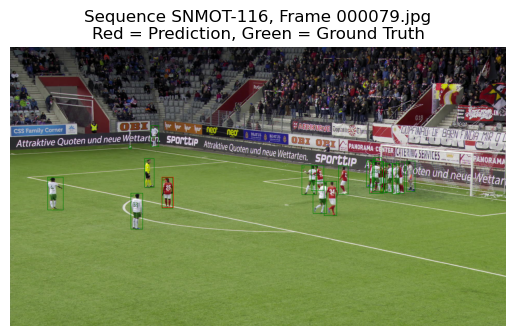

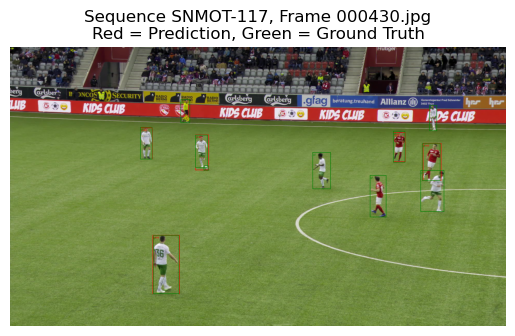

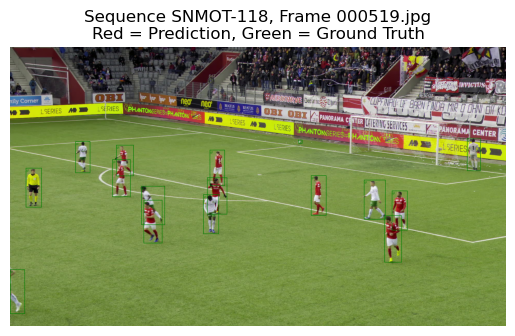

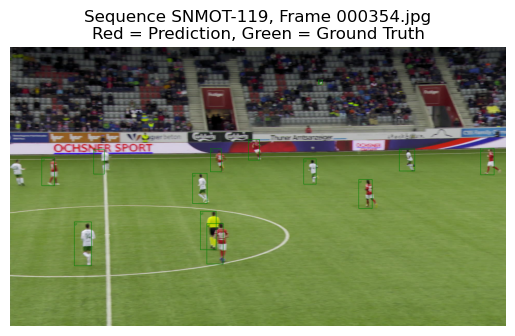

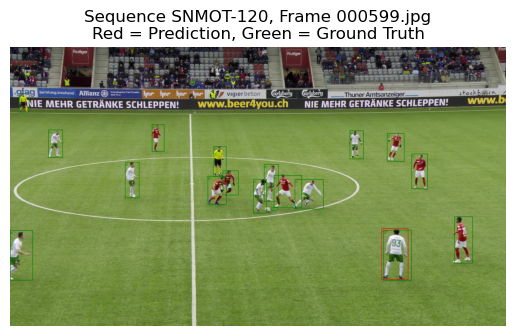

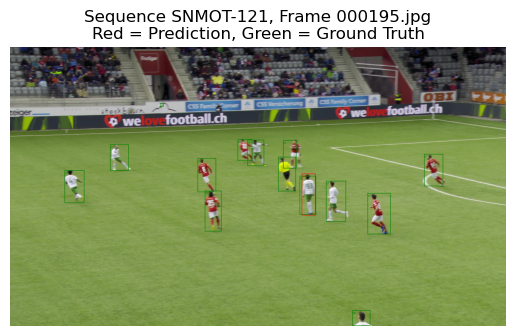

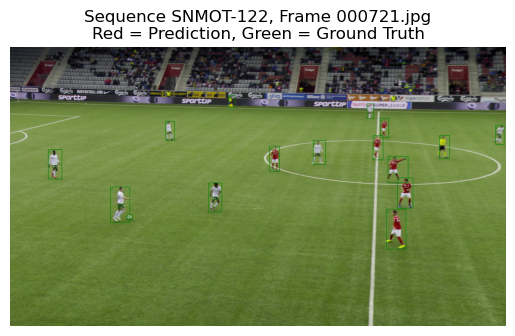

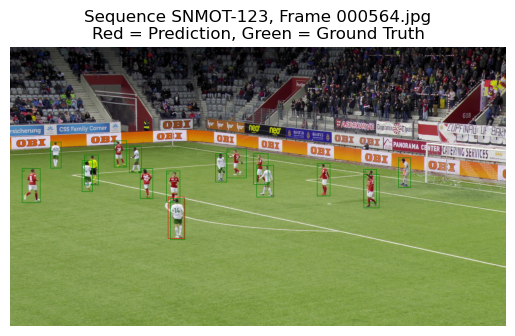

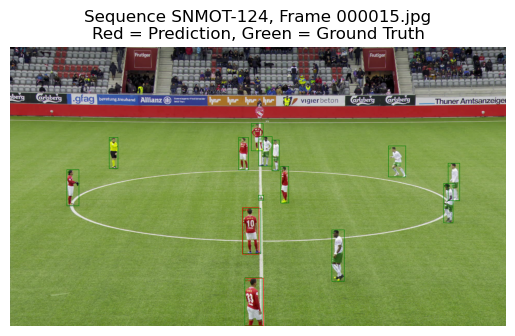

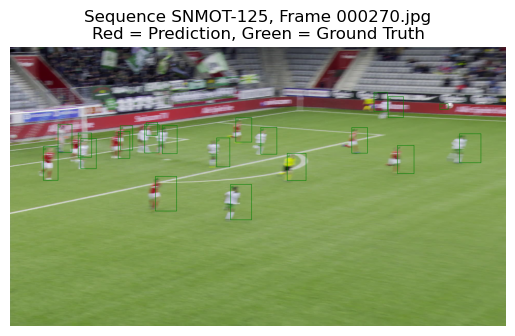

In [3]:


# --- LOAD MODEL ---
model = YOLO("yolo11n.pt")
# model.half().to(DEVICE)
model.to(DEVICE)

transform = T.ToTensor()

def load_gt_boxes(gt_path):
    gt_dict = defaultdict(list)
    if not os.path.exists(gt_path):
        return gt_dict
    with open(gt_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            frame, _, x, y, w, h, cls, _, _ = map(int, parts[:9])
            gt_dict[frame].append(torch.tensor([x, y, x + w, y + h], device=DEVICE))
    return gt_dict

def compute_iou(box1, box2):
    if box1.size(0) == 0 or box2.size(0) == 0:
        return torch.zeros((box1.size(0), box2.size(0)), device=box1.device)
    area1 = (box1[:, 2] - box1[:, 0]) * (box1[:, 3] - box1[:, 1])
    area2 = (box2[:, 2] - box2[:, 0]) * (box2[:, 3] - box2[:, 1])
    lt = torch.max(box1[:, None, :2], box2[:, :2])
    rb = torch.min(box1[:, None, 2:], box2[:, 2:])
    wh = (rb - lt).clamp(min=0)
    inter = wh[:, :, 0] * wh[:, :, 1]
    union = area1[:, None] + area2 - inter
    iou = inter / union
    return iou

def plot_gt_and_detections(image_tensor, detections, gt_boxes):
    from torchvision.utils import draw_bounding_boxes
    all_boxes = []
    labels = []
    colors = []

    for box in detections:
        all_boxes.append(box)
        labels.append("pred")
        colors.append("red")

    for box in gt_boxes:
        all_boxes.append(box)
        labels.append("gt")
        colors.append("green")

    if not all_boxes:
        return T.ToPILImage()(image_tensor)
    
    boxes_tensor = torch.stack(all_boxes).cpu()

    
    x1 = torch.min(boxes_tensor[:, 0], boxes_tensor[:, 2])
    y1 = torch.min(boxes_tensor[:, 1], boxes_tensor[:, 3])
    x2 = torch.max(boxes_tensor[:, 0], boxes_tensor[:, 2])
    y2 = torch.max(boxes_tensor[:, 1], boxes_tensor[:, 3])
    boxes_tensor = torch.stack([x1, y1, x2, y2], dim=1).to(torch.int)
    img_uint8 = (image_tensor * 255).byte().cpu()
    drawn = draw_bounding_boxes(img_uint8, boxes_tensor, labels=labels, colors=colors, width=2)
    return T.ToPILImage()(drawn)

# --- EXECUTION ---
results = []
sample_frames = []
total_tp = total_fp = total_fn = 0

# seq_dirs = []
# for split in ["train", "test"]:
#     split_dir = os.path.join(BASE_DATA_ROOT, split)
#     if not os.path.exists(split_dir):
#         continue
#     for d in sorted(os.listdir(split_dir)):
#         full_path = os.path.join(split_dir, d)
#         if os.path.isdir(full_path):
#             seq_dirs.append((split, d))


# Only use test sequences
seq_dirs = []
test_dir = os.path.join("../soccernet_data/tracking", "test")
if os.path.exists(test_dir):
    for d in sorted(os.listdir(test_dir)):
        full_path = os.path.join(test_dir, d)
        if os.path.isdir(full_path):
            seq_dirs.append(("test", d))


print("Using device:", DEVICE)
print("Processing sequences...")

for split, seq_id in tqdm(seq_dirs, desc="Sequences", dynamic_ncols=True):
    seq_path = os.path.join(BASE_DATA_ROOT, split, seq_id)
    img_dir = os.path.join(seq_path, IMAGE_FOLDER)
    gt_path = os.path.join(seq_path, "gt", GT_FILENAME)
    gt_dict = load_gt_boxes(gt_path)

    if not os.path.exists(img_dir):
        continue

    all_img_paths = sorted([
        os.path.join(img_dir, file)
        for file in os.listdir(img_dir)
        if any(file.lower().endswith(ext) for ext in IMAGE_EXTS)
    ])

    random.shuffle(all_img_paths)
    all_img_paths = all_img_paths[:SAMPLE_PER_SEQ]

    for path in all_img_paths:
        try:
            img = Image.open(path).convert("RGB")
        except:
            continue

        img_tensor = transform(img).unsqueeze(0)
        img_tensor = img_tensor.half()
        img_tensor = img_tensor.squeeze(0) 

        img_tensor = img_tensor.to(DEVICE)



        filename = os.path.basename(path)
        try:
            frame_id = int(filename.split('.')[0])
        except:
            continue

        gt_boxes = gt_dict.get(frame_id, [])

        with torch.no_grad():
            yolo_result = model(img)[0]  # Get first result
            preds = yolo_result.boxes.data.to(DEVICE) if yolo_result.boxes is not None else torch.empty((0, 6)).to(DEVICE)

        pred_boxes = preds[:, :4][preds[:, 4] > SCORE_THRESH] if len(preds) else torch.empty((0, 4), device=DEVICE)

        # Accuracy
        if gt_boxes:
            gt_tensor = torch.stack(gt_boxes).to(DEVICE)
            if len(pred_boxes) > 0:
                ious = compute_iou(pred_boxes, gt_tensor)
                max_ious = ious.max(dim=1)[0]
                acc = (max_ious > IOU_THRESH).float().mean().item()
            else:
                acc = 0.0
        else:
            acc = 1.0 if len(pred_boxes) == 0 else 0.0

        results.append(acc)

        # Precision/Recall
        matched_gt = set()
        tp = fp = 0
        if len(pred_boxes) > 0 and len(gt_boxes) > 0:
            ious = compute_iou(pred_boxes, gt_tensor)
            for i in range(len(pred_boxes)):
                max_iou, gt_idx = ious[i].max(0)
                if max_iou > IOU_THRESH and gt_idx.item() not in matched_gt:
                    tp += 1
                    matched_gt.add(gt_idx.item())
                else:
                    fp += 1
        else:
            tp = 0
            fp = len(pred_boxes)

        fn = len(gt_boxes) - len(matched_gt)
        total_tp += tp
        total_fp += fp
        total_fn += fn

        if len(sample_frames) < NUM_VISUALS and seq_id not in [s[0] for s in sample_frames]:
            img_vis = plot_gt_and_detections(img_tensor, pred_boxes, gt_boxes)
            sample_frames.append((seq_id, filename, img_vis))
            

# --- METRICS ---
precision = total_tp / (total_tp + total_fp + 1e-6)
recall = total_tp / (total_tp + total_fn + 1e-6)
avg_acc = sum(results) / len(results) if results else 0
print(f"\nAverage Detection Accuracy over {len(results)} frames: {avg_acc * 100:.2f}%")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")

# --- SHOW EXAMPLES ---
for seq_id, filename, img in sample_frames:
    plt.imshow(img)
    plt.title(f"Sequence {seq_id}, Frame {filename}\nRed = Prediction, Green = Ground Truth")
    plt.axis("off")
    plt.show()


In [4]:

os.makedirs("baseline_imgs/8-5", exist_ok=True)
for seq_id, filename, img in sample_frames:
    img.save(os.path.join("baseline_imgs/8-5", f"{seq_id}_{filename}"))

# Save metrics
# os.makedirs("metrics", exist_ok=True)
with open("baseline_imgs/8-5/metrics.txt", "w") as f:
    f.write(f"Score Threshold: {SCORE_THRESH}\n")
    f.write(f"IOU Threshold: {IOU_THRESH}\n")
    f.write(f"Total frames processed: {len(results)}\n")
    f.write(f"Average Detection Accuracy: {avg_acc * 100:.2f}%\n")
    f.write(f"Precision: {precision:.3f}, Recall: {recall:.3f}\n")
    f.write(f"Total TP: {total_tp}, Total FP: {total_fp}, Total FN: {total_fn}\n")
